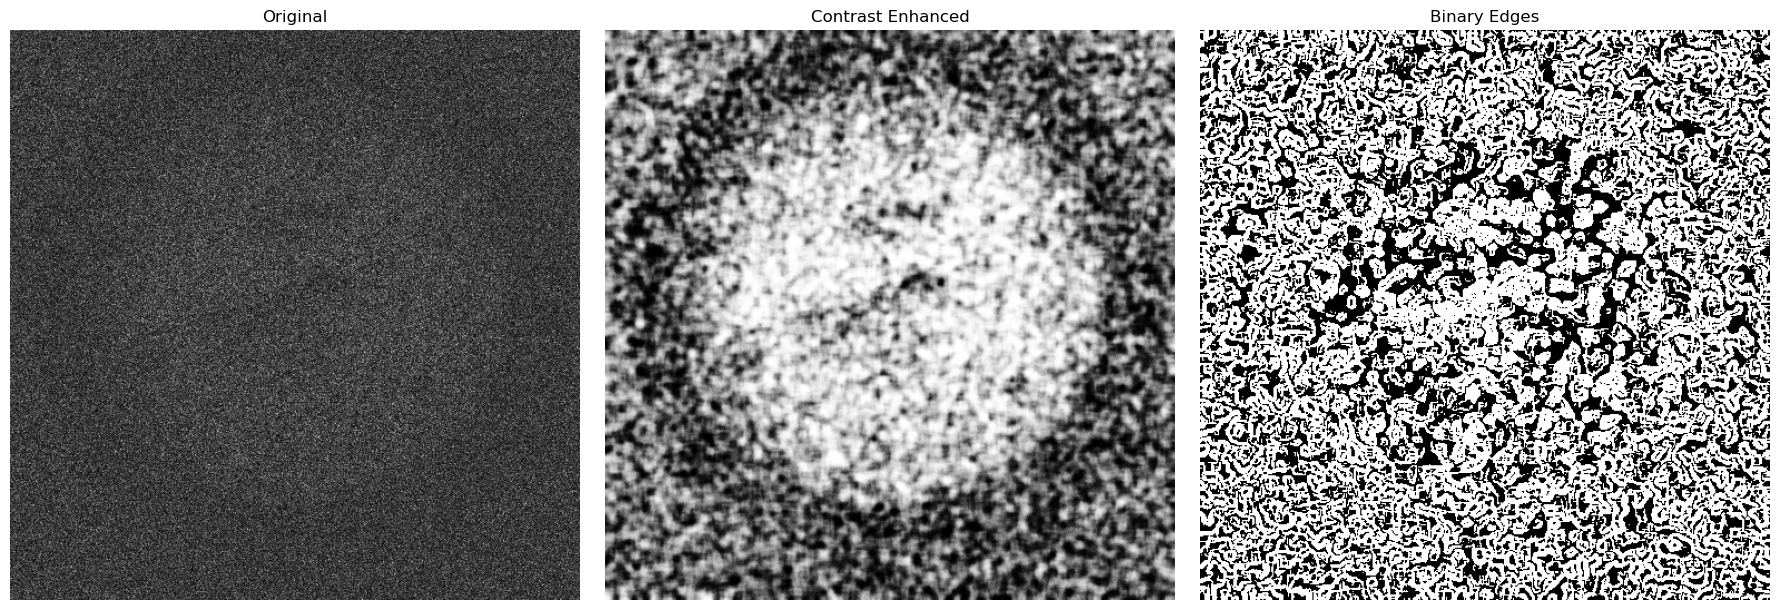

In [48]:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt

# Load the image
img = np.array(Image.open('clock_noise1.png').convert('L'))

# Define average filter function
def average_filter(img, kernel_size):
    m, n = img.shape
    pad = kernel_size // 2
    img_padded = np.pad(img, pad_width=pad, mode='reflect')
    img_filtered = np.zeros_like(img)
    for i in range(m):
        for j in range(n):
            img_filtered[i, j] = np.mean(img_padded[i:i+kernel_size, j:j+kernel_size])
    return img_filtered

# Define Gaussian filter function
def gaussian_filter(img, kernel_size, sigma):
    m, n = img.shape
    pad = kernel_size // 2
    img_padded = np.pad(img, pad_width=pad, mode='reflect')
    img_filtered = np.zeros_like(img)
    kernel = np.fromfunction(lambda x, y: (1/(2*np.pi*sigma**2)) * np.exp(-((x-pad)**2 + (y-pad)**2) / (2*sigma**2)), (kernel_size, kernel_size))
    kernel /= np.sum(kernel)
    for i in range(m):
        for j in range(n):
            img_filtered[i, j] = np.sum(img_padded[i:i+kernel_size, j:j+kernel_size] * kernel)
    return img_filtered

# Define histogram equalization function
def histogram_equalization(img):
    hist, _ = np.histogram(img.flatten(), 256, [0, 256])
    cdf = hist.cumsum()
    cdf_normalized = cdf * 255 / cdf.max()
    img_eq = np.interp(img.flatten(), np.arange(256), cdf_normalized).reshape(img.shape)
    return img_eq.astype('uint8')

# Define high-pass filter function
def high_pass_filter(img, kernel_size):
    m, n = img.shape
    pad = kernel_size // 2
    img_padded = np.pad(img, pad_width=pad, mode='reflect')
    img_filtered = np.zeros_like(img)
    kernel = np.ones((kernel_size, kernel_size)) * -1
    kernel[pad, pad] = kernel_size**2 - 1
    for i in range(m):
        for j in range(n):
            img_filtered[i, j] = np.sum(img_padded[i:i+kernel_size, j:j+kernel_size] * kernel)
    return img_filtered

# Define weighted sum function
def weighted_sum(img1, img2, alpha):
    return np.clip(alpha * img1 + (1 - alpha) * img2, 0, 255).astype('uint8')

# Define Sobel filter function
def sobel_filter(img):
    sobel_x = np.array([[-1, 0, 1], [-2, 0, 2], [-1, 0, 1]])
    sobel_y = np.array([[-1, -2, -1], [0, 0, 0], [1, 2, 1]])
    
    img_padded = np.pad(img, pad_width=1, mode='reflect')
    grad_x = np.zeros_like(img)
    grad_y = np.zeros_like(img)
    
    for i in range(img.shape[0]):
        for j in range(img.shape[1]):
            grad_x[i, j] = np.sum(img_padded[i:i+3, j:j+3] * sobel_x)
            grad_y[i, j] = np.sum(img_padded[i:i+3, j:j+3] * sobel_y)
    
    grad_mag = np.sqrt(grad_x**2 + grad_y**2)
    grad_mag = (grad_mag / grad_mag.max()) * 255
    return grad_mag.astype('uint8')

# Define Laplacian filter function
def laplacian_filter(img):
    laplacian_kernel = np.array([[0, 1, 0], [1, -4, 1], [0, 1, 0]])
    img_padded = np.pad(img, pad_width=1, mode='reflect')
    img_filtered = np.zeros_like(img)
    for i in range(img.shape[0]):
        for j in range(img.shape[1]):
            img_filtered[i, j] = np.sum(img_padded[i:i+3, j:j+3] * laplacian_kernel)
    img_filtered = np.clip(img_filtered, 0, 255).astype('uint8')
    return img_filtered

# Define Gaussian high-pass filter function
def gaussian_high_pass_filter(img, kernel_size=3, sigma=1.0):
    low_pass = gaussian_filter(img, kernel_size, sigma)
    high_pass = img - low_pass
    high_pass = np.clip(high_pass, 0, 255).astype('uint8')
    return high_pass

# Apply average filter for initial smoothing
kernel_size = 7
img_avg = average_filter(img, kernel_size)

# Apply Gaussian filter for noise reduction
kernel_size = 5
sigma = 1.0
img_gauss = gaussian_filter(img_avg, kernel_size, sigma)

# Apply histogram equalization for contrast enhancement
img_eq = histogram_equalization(img_gauss)

# Apply Sobel edge detection
edges = sobel(img_eq)

# Apply CLAHE for contrast enhancement on the edge image
clahe = exposure.equalize_adapthist(edges, clip_limit=0.03)

# Binarize the edge image
thresh = 0.4  # Adjust the threshold value as needed
binary_edges = (clahe > thresh).astype(np.uint8) * 255

# Display the original and processed images
fig, axs = plt.subplots(1, 3, figsize=(18, 6))
axs[0].imshow(img, cmap='gray')
axs[0].set_title('Original')
axs[1].imshow(img_eq, cmap='gray')
axs[1].set_title('Contrast Enhanced')
axs[2].imshow(binary_edges, cmap='gray')
axs[2].set_title('Binary Edges')

for ax in axs.flat:
    ax.axis('off')

plt.tight_layout()
plt.show()

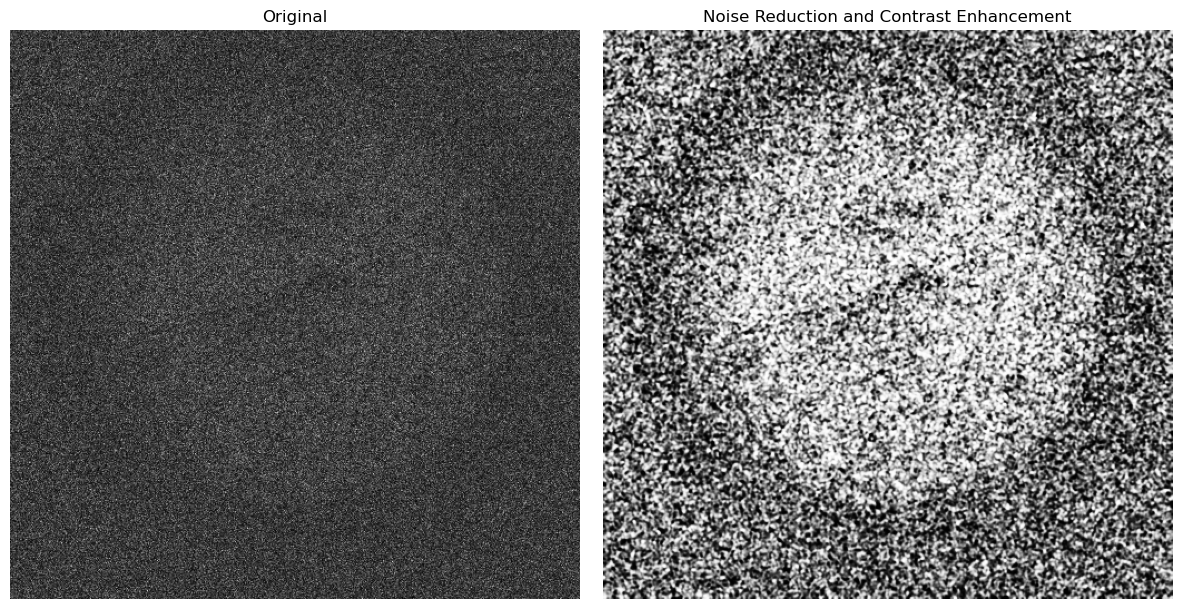

In [49]:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt

# Load the image
img = np.array(Image.open('clock_noise1.png').convert('L'))

# Define Gaussian filter function
def gaussian_filter(img, kernel_size, sigma):
    m, n = img.shape
    pad = kernel_size // 2
    img_padded = np.pad(img, pad_width=pad, mode='reflect')
    img_filtered = np.zeros_like(img)
    kernel = np.fromfunction(lambda x, y: (1/(2*np.pi*sigma**2)) * np.exp(-((x-pad)**2 + (y-pad)**2) / (2*sigma**2)), (kernel_size, kernel_size))
    kernel /= np.sum(kernel)
    for i in range(m):
        for j in range(n):
            img_filtered[i, j] = np.sum(img_padded[i:i+kernel_size, j:j+kernel_size] * kernel)
    return img_filtered

# Define histogram equalization function
def histogram_equalization(img):
    hist, _ = np.histogram(img.flatten(), 256, [0, 256])
    cdf = hist.cumsum()
    cdf_normalized = cdf * 255 / cdf.max()
    img_eq = np.interp(img.flatten(), np.arange(256), cdf_normalized).reshape(img.shape)
    return img_eq.astype('uint8')

# Apply Gaussian filter for noise reduction
kernel_size = 5
sigma = 1.0
img_denoised = gaussian_filter(img, kernel_size, sigma)

# Apply histogram equalization for contrast enhancement
img_enhanced = histogram_equalization(img_denoised)

# Display the original and processed images
fig, axs = plt.subplots(1, 2, figsize=(12, 6))
axs[0].imshow(img, cmap='gray')
axs[0].set_title('Original')
axs[1].imshow(img_enhanced, cmap='gray')
axs[1].set_title('Noise Reduction and Contrast Enhancement')

for ax in axs.flat:
    ax.axis('off')

plt.tight_layout()
plt.show()

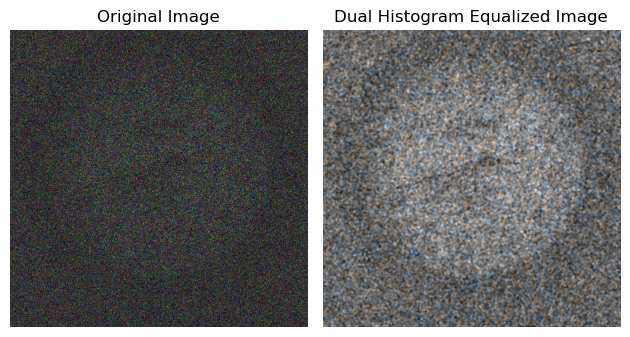

In [4]:
import numpy as np
from PIL import Image
from scipy.ndimage import gaussian_filter, median_filter
import matplotlib.pyplot as plt

# 이미지 로드
img = Image.open('clock_noise1.png')

# 이미지를 numpy 배열로 변환
img_array = np.array(img)

# 가우시안 블러링 적용
gaussian_blurred = gaussian_filter(img_array, sigma=1)

# 미디언 필터 적용
median_filtered = median_filter(gaussian_blurred, size=3)

# 첫 번째 히스토그램 평활화
equalized_img1 = (np.floor((median_filtered - np.min(median_filtered)) / (np.max(median_filtered) - np.min(median_filtered)) * 255)).astype(np.uint8)

# 두 번째 히스토그램 평활화
equalized_img2 = (np.floor((equalized_img1 - np.min(equalized_img1)) / (np.max(equalized_img1) - np.min(equalized_img1)) * 255)).astype(np.uint8)

# 결과 이미지 생성
filtered_img = Image.fromarray(equalized_img2)

# 원본 이미지와 노이즈 제거된 이미지 출력
plt.subplot(1, 2, 1)
plt.imshow(img, cmap='gray')
plt.title('Original Image')
plt.axis('off')

plt.subplot(1, 2, 2) 
plt.imshow(filtered_img, cmap='gray')
plt.title('Dual Histogram Equalized Image')
plt.axis('off')

plt.tight_layout()
plt.show()

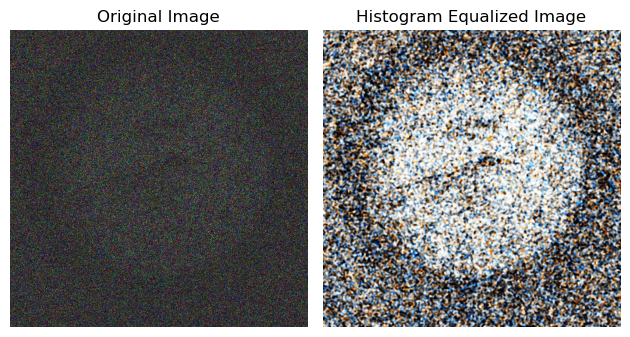

In [6]:
import numpy as np
from PIL import Image
from scipy.ndimage import gaussian_filter, median_filter
import matplotlib.pyplot as plt

# 이미지 로드
img = Image.open('clock_noise1.png')

# 이미지를 numpy 배열로 변환
img_array = np.array(img)

# 가우시안 필터 적용
gaussian_blurred = gaussian_filter(img_array, sigma=1)

# 미디언 필터 적용
median_filtered = median_filter(gaussian_blurred, size=3)

# 히스토그램 평활화 함수 정의
def histogram_equalization(img):
    # 히스토그램 계산
    histogram, _ = np.histogram(img, bins=256, range=(0, 255))
    
    # 누적 분포 함수 계산
    cdf = histogram.cumsum()
    cdf_normalized = cdf * 255 / cdf.max()
    
    # 히스토그램 평활화 적용
    equalized_img = np.interp(img.flatten(), np.arange(256), cdf_normalized)
    equalized_img = equalized_img.reshape(img.shape)
    
    return equalized_img.astype(np.uint8)

# 히스토그램 평활화 적용
equalized_img = histogram_equalization(median_filtered)

# 결과 이미지 생성
filtered_img = Image.fromarray(equalized_img)

# 원본 이미지와 대조 강화된 이미지 출력
plt.subplot(1, 2, 1)
plt.imshow(img, cmap='gray')
plt.title('Original Image')
plt.axis('off')

plt.subplot(1, 2, 2) 
plt.imshow(filtered_img, cmap='gray')
plt.title('Histogram Equalized Image')
plt.axis('off')

plt.tight_layout()
plt.show()

In [ ]:
#---------------------------여기부터----------------------------------

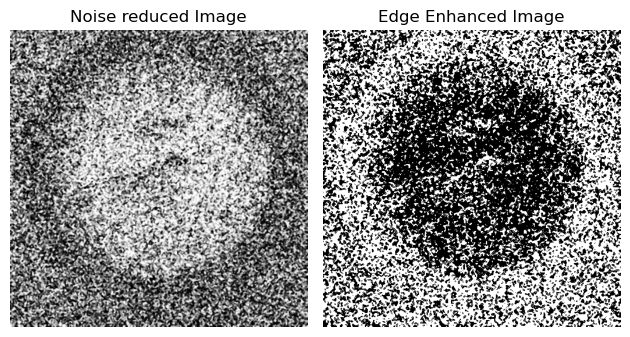

In [27]:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt

def gaussian_filter(img, kernel_size=3, sigma=1):
    k = (kernel_size - 1) // 2
    kernel = np.zeros((kernel_size, kernel_size))
    for i in range(kernel_size):
        for j in range(kernel_size):
            x, y = i-k, j-k
            kernel[i, j] = np.exp(-(x**2 + y**2) / (2*sigma**2))
    kernel /= kernel.sum()
    
    padded_img = np.pad(img, (k, k), mode='reflect')
    output = np.zeros_like(img, dtype=np.float32)
    for i in range(img.shape[0]):
        for j in range(img.shape[1]):
            window = padded_img[i:i+kernel_size, j:j+kernel_size]
            output[i, j] = np.sum(window * kernel)
    
    return output.astype(np.uint8)

def median_filter(img, kernel_size=3):
    k = (kernel_size - 1) // 2
    padded_img = np.pad(img, (k, k), mode='reflect')
    output = np.zeros_like(img)
    for i in range(img.shape[0]):
        for j in range(img.shape[1]):
            window = padded_img[i:i+kernel_size, j:j+kernel_size]
            output[i, j] = np.median(window)
    
    return output.astype(np.uint8)

def histogram_equalization(img):
    hist, _ = np.histogram(img, bins=256, range=[0, 255])
    
    cdf = hist.cumsum()
    cdf_normalized = cdf * 255 / cdf.max()
    
    equalized_img = np.interp(img.flatten(), np.arange(256), cdf_normalized)
    equalized_img = equalized_img.reshape(img.shape)
    
    return equalized_img.astype(np.uint8)

def laplacian_filter(img):
    kernel = np.array([[0, -1, 0],
                       [-1, 4, -1],
                       [0, -1, 0]])
    padded_img = np.pad(img, (1, 1), mode='reflect')
    output = np.zeros_like(img, dtype=np.float32)
    for i in range(img.shape[0]):
        for j in range(img.shape[1]):
            window = padded_img[i:i+3, j:j+3]
            output[i, j] = np.sum(window * kernel)
    output = (output - output.min()) / (output.max() - output.min()) * 255
    return output.astype(np.uint8)
    
def binarize(img, threshold=128):
    return (img > threshold).astype(np.uint8)

def sobel_filter(img):
    kernel_x = np.array([[-1, 0, 1], [-2, 0, 2], [-1, 0, 1]])
    kernel_y = np.array([[1, 2, 1], [0, 0, 0], [-1, -2, -1]])

    padded_img = np.pad(img, 1, mode='reflect')
    sobel_x = np.zeros_like(img, dtype=np.float32)
    sobel_y = np.zeros_like(img, dtype=np.float32)

    for i in range(img.shape[0]):
        for j in range(img.shape[1]):
            window = padded_img[i:i+3, j:j+3]
            sobel_x[i, j] = np.sum(window * kernel_x)
            sobel_y[i, j] = np.sum(window * kernel_y)

    sobel_img = np.sqrt(sobel_x ** 2 + sobel_y ** 2)
    sobel_img = (sobel_img - sobel_img.min()) / (sobel_img.max() - sobel_img.min()) * 255
    return sobel_img.astype(np.uint8)
    
img = Image.open('clock_noise1.png').convert('L')  # grayscale로 변환
img_array = np.array(img)

# 가우시안 필터 적용
gaussian_img = gaussian_filter(img_array)
# 미디언 필터 적용
median_img = median_filter(gaussian_img)
# histogram_equal 적용
equalized_img = histogram_equalization(median_img)

# Sobel과 Laplacian 필터 적용
sobel_img = sobel_filter(equalized_img)
laplacian_img = laplacian_filter((sobel_img))
laplacian_img = laplacian_filter(laplacian_img)

# 엣지 강조 이미지 생성
edge_enhanced_img = np.maximum(sobel_img, laplacian_img)
edge_enhanced_img = (edge_enhanced_img > 128).astype(np.uint8) * 255  # 이진화

binary_img = binarize(equalized_img, threshold=128)
bg_removed_img = edge_enhanced_img.copy()
bg_removed_img[binary_img == 0] = 0 

plt.subplot(1, 2, 1)
plt.imshow(Image.fromarray(equalized_img), cmap='gray')
plt.title('Noise reduced Image')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(Image.fromarray(bg_removed_img), cmap='binary')
plt.title('Edge Enhanced Image')
plt.axis('off')

plt.tight_layout()
plt.show()

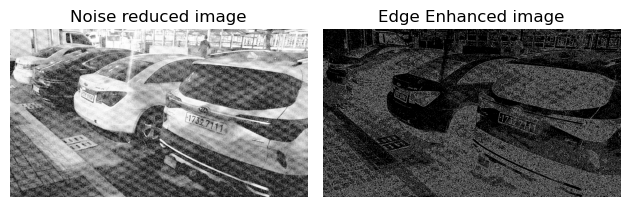

In [28]:
# 이미지 로드
img = Image.open('cars1_noise.png').convert('L')
img_array = np.array(img)

# 가우시안 필터 적용
gaussian_img = gaussian_filter(img_array)
# 미디언 필터 적용
median_img = median_filter(gaussian_img)
# histogram_equal 적용
equalized_img = histogram_equalization(median_img)

# Sobel과 Laplacian 필터 적용
sobel_img = sobel_filter(equalized_img)
laplacian_img = laplacian_filter(equalized_img)

edge_enhanced_img = np.maximum(sobel_img, laplacian_img)

binary_edge_img = binarize(edge_enhanced_img)

# 결과 출력
plt.subplot(1, 2, 1)
plt.imshow(Image.fromarray(equalized_img), cmap='gray')
plt.title('Noise reduced image')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(Image.fromarray(binary_edge_img), cmap='binary')
plt.title('Edge Enhanced image')
plt.axis('off')

plt.tight_layout()
plt.show()

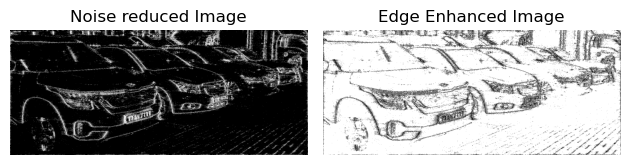

In [40]:
def highpass_filter(img, cutoff_freq=130):
    f = np.fft.fft2(img)
    fshift = np.fft.fftshift(f)
    
    rows, cols = img.shape
    crow, ccol = rows // 2, cols // 2
    mask = np.ones((rows, cols), np.uint8)
    mask[crow-cutoff_freq:crow+cutoff_freq, ccol-cutoff_freq:ccol+cutoff_freq] = 0
    
    fshift_filtered = fshift * mask
    f_filtered = np.fft.ifftshift(fshift_filtered)
    img_filtered = np.fft.ifft2(f_filtered)
    img_filtered = np.abs(img_filtered)
    
    return img_filtered.astype(np.uint8)

# 이미지 로드
img = Image.open('cars2_noise.png').convert('L')
img_array = np.array(img)

filtered_img = median_filter(img_array, kernel_size=3)  # 미디언 필터 적용
filtered_img = gaussian_filter(filtered_img, kernel_size=3, sigma=0.3)  # 가우시안 필터 적용
filtered_img = highpass_filter(filtered_img, cutoff_freq=130)  # highpass 필터 적용

# 대비 향상 및 이진화
equalized_img = histogram_equalization(filtered_img)  # 히스토그램 평활화
binary_img = binarize(equalized_img, threshold=128)  # 이진화

laplacian_img = laplacian_filter(equalized_img)
laplacian_gt_img = laplacian_img + equalized_img
edge_enhanced_img = (laplacian_gt_img > 128).astype(np.uint8) * 255  # 이진화

bg_removed_img = edge_enhanced_img.copy()
bg_removed_img[binary_img == 0] = 0 

plt.subplot(1, 2, 1)
plt.imshow(Image.fromarray(equalized_img), cmap='gray')
plt.title('Noise reduced Image')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(Image.fromarray(bg_removed_img), cmap='binary')
plt.title('Edge Enhanced Image')
plt.axis('off')

plt.tight_layout()
plt.show()